In [1]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
   
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn
import pandas as pd

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb

from tigramite.models import LinearMediation, Prediction

In [2]:
building1_data = pd.read_csv("citylearn_challenge_2023_phase_1/Building_1.csv")
building2_data = pd.read_csv("citylearn_challenge_2023_phase_1/Building_2.csv")
building3_data = pd.read_csv("citylearn_challenge_2023_phase_1/Building_3.csv")

building1_data['building'] = "building1"
building2_data['building'] = "building2"
building3_data['building'] = "building3"

dataset = pd.concat([building1_data, building2_data, building3_data])
dataset = dataset.sort_values(by=['building', 'month'])

print(dataset)

     month  hour  day_type  daylight_savings_status  \
0        6     1         5                        0   
1        6     2         5                        0   
2        6     3         5                        0   
3        6     4         5                        0   
4        6     5         5                        0   
..     ...   ...       ...                      ...   
715      6    20         6                        0   
716      6    21         6                        0   
717      6    22         6                        0   
718      6    23         6                        0   
719      6    24         6                        0   

     indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                      23.098652                                  -0.123570   
1                      22.234743                                   0.012520   
2                      22.223060                                   0.000838   
3                      

In [3]:
weather_data = pd.read_csv("citylearn_challenge_2023_phase_1/weather.csv")
print(weather_data)

     outdoor_dry_bulb_temperature  outdoor_relative_humidity  \
0                           24.66                      77.56   
1                           24.07                      85.12   
2                           23.90                      89.62   
3                           23.87                      91.88   
4                           23.83                      93.06   
..                            ...                        ...   
715                         31.98                      43.75   
716                         29.92                      51.62   
717                         28.48                      59.12   
718                         27.27                      66.56   
719                         26.26                      73.75   

     diffuse_solar_irradiance  direct_solar_irradiance  \
0                        0.00                     0.00   
1                        0.00                     0.00   
2                        0.00                     0.00   

In [4]:
dataset['outdoor_dry_bulb_temperature'] = weather_data['outdoor_dry_bulb_temperature']
dataset['outdoor_relative_humidity'] = weather_data['outdoor_relative_humidity']
print(dataset)

     month  hour  day_type  daylight_savings_status  \
0        6     1         5                        0   
1        6     2         5                        0   
2        6     3         5                        0   
3        6     4         5                        0   
4        6     5         5                        0   
..     ...   ...       ...                      ...   
715      6    20         6                        0   
716      6    21         6                        0   
717      6    22         6                        0   
718      6    23         6                        0   
719      6    24         6                        0   

     indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                      23.098652                                  -0.123570   
1                      22.234743                                   0.012520   
2                      22.223060                                   0.000838   
3                      

In [5]:
dataset = dataset.sort_values(by=['building', 'month'])
columns_of_interest = ['indoor_dry_bulb_temperature','indoor_relative_humidity','indoor_dry_bulb_temperature_set_point','outdoor_dry_bulb_temperature','outdoor_relative_humidity']
dataset = dataset[columns_of_interest + ['building']]


print(dataset)

     indoor_dry_bulb_temperature  indoor_relative_humidity  \
0                      23.098652                 61.086185   
1                      22.234743                 64.361380   
2                      22.223060                 64.493416   
3                      22.222250                 64.769700   
4                      22.222237                 65.152120   
..                           ...                       ...   
715                    24.444447                 55.401950   
716                    24.444450                 55.363644   
717                    24.444450                 55.452953   
718                    24.444450                 55.501358   
719                    24.444440                 55.706670   

     indoor_dry_bulb_temperature_set_point  outdoor_dry_bulb_temperature  \
0                                23.222221                         24.66   
1                                22.222221                         24.07   
2                          

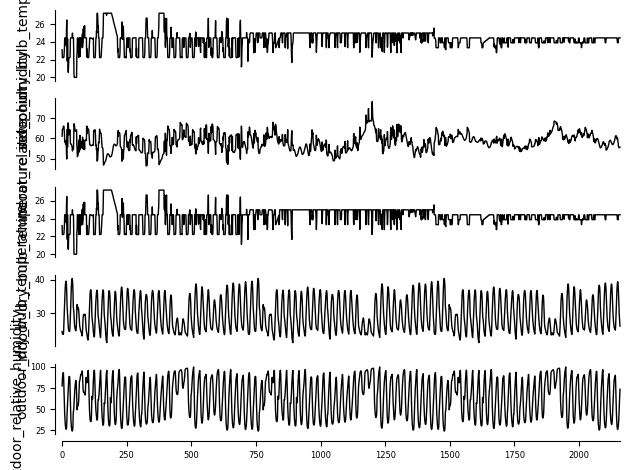

In [6]:
data_array = dataset.drop(columns=['building']).values
var_names = columns_of_interest
dataframe = pp.DataFrame(data=data_array, var_names=var_names)
tp.plot_timeseries(dataframe); plt.show()

In [7]:
#Specifica del test di indipendenza
parcorr = ParCorr()

#esecuzione PCMCI
pcmci_parcorr = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)

#definisco i lag da considerare
results = pcmci_parcorr.run_pcmci(tau_max=5, pc_alpha=0.2, alpha_level = 0.01)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 5
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable indoor_dry_bulb_temperature has 6 link(s):
        (indoor_dry_bulb_temperature -1): max_pval = 0.00004, |min_val| =  0.088
        (indoor_dry_bulb_temperature_set_point -1): max_pval = 0.00486, |min_val| =  0.061
        (indoor_dry_bulb_temperature -2): max_pval = 0.01103, |min_val| =  0.055
        (outdoor_relative_humidity -5): max_pval = 0.04508, |min_val| =  0.043
        (outdoor_dry_bulb_temperature -2): max_pval = 0.05916, |min_val| =  0.041
        (outdoor_dry_bulb_temperature -1): max_pval = 0.09714, |min_val| =  0.036

    Variable indoor_relative_humidity has 7 link(s):
        (indoor_relative_humidity -1): max_pval = 0.00000, |min_val| =  0.709
        (outdoor_relative_humidity -1): max_pval = 0.00002, |min_val| =  0.093
    

In [8]:
#Visualizzo i risultati
print("p-values:")
print(results['p_matrix'])
print("Valori causali:")
print(results['val_matrix'])

p-values:
[[[1.00000000e+000 3.25408194e-004 5.63621451e-009 8.22612913e-006
   1.71320235e-006 5.94300749e-001]
  [0.00000000e+000 1.02330975e-004 5.75232332e-001 7.97566207e-006
   8.79254005e-002 3.67976192e-001]
  [0.00000000e+000 4.32897720e-001 3.67565695e-009 7.07886520e-001
   1.74984594e-001 2.35693562e-001]
  [9.34734892e-001 1.31150306e-001 1.77850228e-001 9.48972010e-001
   6.93347982e-001 1.55419454e-001]
  [8.35448354e-001 2.70237282e-001 6.93220138e-001 7.50303437e-003
   8.37968386e-001 1.74314785e-003]]

 [[0.00000000e+000 8.56576847e-001 4.24699423e-001 1.54460413e-005
   3.53770725e-006 3.58385452e-001]
  [1.00000000e+000 5.38751685e-023 2.90584570e-007 4.74443749e-001
   1.12841555e-001 7.05484533e-001]
  [0.00000000e+000 9.30379313e-001 5.35040726e-001 6.57852946e-001
   2.35634745e-001 3.65979628e-001]
  [1.79210012e-001 1.34415673e-001 1.09876316e-001 1.07829486e-002
   6.71554492e-001 1.20200550e-001]
  [7.82291249e-002 5.59901428e-001 7.00481397e-001 5.57968148

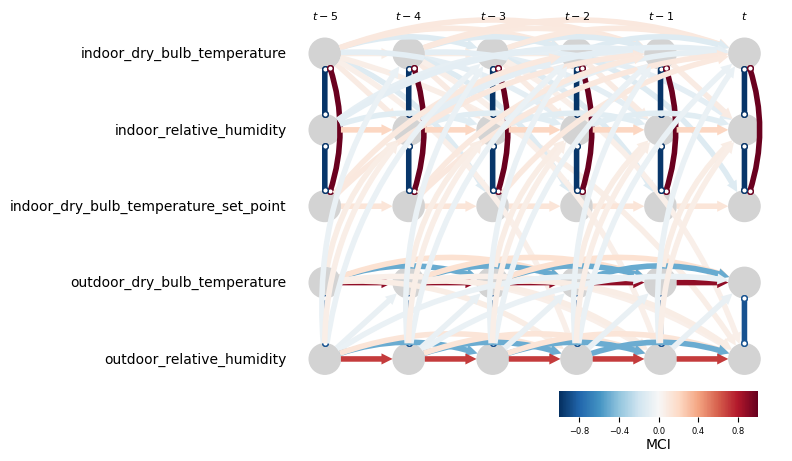

In [9]:
#mostro il plot del grafo delle time_series
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=list(var_names),
    link_colorbar_label='MCI',
    ); plt.show()